# Image Data Augmentation with Keras
<p style = "text-align: right"><i><b>Tiến Nguyễn</p>

Tăng cường dữ liệu(Data Agumentation) nói chung hay dữ liệu ảnh nói riêng là một kĩ thuật dùng để tăng dữ liệu cho dataset của chúng ta bằng cách tạo ra một phiên bản mới của các ảnh trong dataset. Huấn luyện mô hình mạng neural học sâu(Deep Learning Neural Network Model) với dữ liệu nhiều sẽ đem lại mô hình có tính chính xác cao, kĩ thuật tăng tường này có thể tạo ra sự biến đổi ảnh, từ đó giúp cải thiện khả năng phù hợp của mô hình để sinh ra những thứ mà nó được học từ các ảnh mới. 
Thư viện [Keras](keras.io) cung cấp sẵn công cụ cho việc tăng cường dữ liệu qua lớp đối tượng ImageDataGenerator.

## Nội dung
1. Image Data Augmentation.
2. Sample Image.
3. Image Augmentation With ImageDataGenerator.
4. Horizontal and Vertical Shift Augmentation.
5. Horizontal and Vertical Flip Augmentation.
6. Random Rotation Augmentation
7. Random Brightness Augmentation
8. Random Zoom Augmentation
----

## 1. Image Data Augmentation
**Tăng cường dữ liệu ảnh.**

-	Hiệu suất hay cụ thể là tính chính xác của các mạng neural học sâu thường được improve khi chúng ta tăng cường dữ liệu huấn luận.

![Tập dữ liệu và hiệu suất](dataset-performance.png)

-	Tăng cường dữ liệu là kĩ thuật tạo ra dữ liệu huấn luyện mới từ những dữ liệu huấn luyện có sẵn ban đầu. Điều này được thực hiện bằng cách áp dụng kĩ thuật domain-specific cho các mẫu dữ liệu huấn luyện để tạo ra các dữ liệu huấn luyện mới và khác với bản gốc của nó.
-	Tăng cường dữ liệu ảnh có lẽ là cách khá là kinh điển của tăng cường dữ liệu và liên quan đến việc tạo ra các version hình ảnh được chuyển đổi trong tập dữ liệu huấn luyện thuộc cùng một lớp với hình ảnh gốc.
-	Các biến đổi bao gồm một loạt các hoạt động từ lĩnh vực thao tác hình ảnh, chẳng hạn như dịch chuyển, lật, thu phóng, và nhiều hơn nữa.
-	Mục đích là để mở rộng tập dữ liệu đào tạo với các mẫu mới nhưng hợp lý. Điều này có nghĩa là, các biến thể của hình ảnh tập huấn có khả năng được học bởi mô hình. Ví dụ, một bức ảnh lật ngang của một con mèo có thể có ý nghĩa, bởi vì bức ảnh có thể được chụp từ bên trái hoặc bên phải. Việc lật dọc bức ảnh của một con mèo không có ý nghĩa và có lẽ sẽ không phù hợp nếu người rất khó nhìn thấy bức ảnh của một con mèo lộn ngược.
-	Như vậy, rõ ràng rằng việc lựa chọn các kỹ thuật tăng dữ liệu cụ thể được sử dụng cho tập dữ liệu huấn luyện phải được chọn cẩn thận và trong ngữ cảnh của tập dữ liệu huấn luyện và phạm vi của bài toán. Ngoài ra, sẽ hữu ích khi thử nghiệm các phương pháp tăng dữ liệu một cách độc lập và phối hợp để xem liệu chúng có dẫn đến sự cải thiện hiệu suất mô hình hay không.
-	Các thuật toán học sâu hiện đại, chẳng hạn như Convolutional Neural Network(ConvNet), có thể học được các đặc trưng bất biến đối với vị trí của chúng trong hình ảnh. Tuy nhiên, sự tăng cường có thể hỗ trợ thêm cho cách tiếp cận chuyển đổi bất biến này đối với việc học và có thể hỗ trợ mô hình trong việc học các đặc trưng cũng bất biến đối với các biến đổi như thứ tự từ trái sang phải từ trên xuống dưới, mức độ ánh sáng trong ảnh và hơn thế nữa.
-	Tăng dữ liệu hình ảnh thường chỉ được áp dụng cho tập dữ liệu huấn luyện, và không áp dụng cho tập dữ liệu kiểm tra hoặc xác thực. Điều này khác với việc chuẩn bị dữ liệu như thay đổi kích thước hình ảnh và chia tỷ lệ pixel; chúng phải được thực hiện nhất quán trên tất cả các bộ dữ liệu tương tác với mô hình.

## 2. Sample Images

Chúng ta sẽ xem ví dụ mẫu về tăng cường ảnh cho một hình ảnh mẫu bằng kĩ thuật tăng cường dữ liệu chuẩn. Giả sử chúng ta có bức hình như dưới đây. 
![Sample Images](bird.jpg)

## 3. Image Augmentation With ImageDataGenerator

-	Thư viện Keras, cung cấp cho chúng ta chức năng tự động sinh dữ liệu tăng cường khi huấn luyện mô hình. Điều này được thực hiện nhờ ImageDataGenerator class.
-	Một loạt các kỹ thuật được hỗ trợ, cũng như các phương pháp chia tỷ lệ pixel. Chúng ta sẽ tập trung vào năm loại kỹ thuật tăng dữ liệu chính cho dữ liệu hình ảnh, cụ thể là:
    - Image shifts via the width_shift_range and height_shift_range arguments.
    - Image flips via the horizontal_flip and vertical_flip arguments.
    - Image rotations via the rotation_range argument
    - Image brightness via the brightness_range argument.
    - Image zoom via the zoom_range argument.

## 4. Horizontal and Vertical Shift Augmentation

Dịch chuyển hình ảnh có nghĩa là di chuyển tất cả các pixel của hình ảnh theo một hướng, chẳng hạn như theo chiều ngang hoặc chiều dọc, trong khi vẫn giữ nguyên kích thước hình ảnh.

Điều này có nghĩa là một số pixel sẽ bị bỏ đi và sẽ có một vùng của hình ảnh nơi các giá trị pixel mới sẽ phải được chỉ định.

Các đối số `width_shift_range` và `height_shift_range` cho hàm **`ImageDataGenerator()`** kiểm soát lượng dịch chuyển ngang và dọc tương ứng.

Các đối số này có thể là giá trị floating-point cho biết tỷ lệ phần trăm(từ 0 đến 1) của chiều rộng hoặc chiều cao của hình ảnh để thay đổi.

Ví dụ dưới đây biểu thị sự dịch chuyển ngang với đối số `width_shift_range` giữa $ [-200,200] $ pixel và tạo ra một chuỗi các hình ảnh được tạo để thể hiện hiệu ứng.

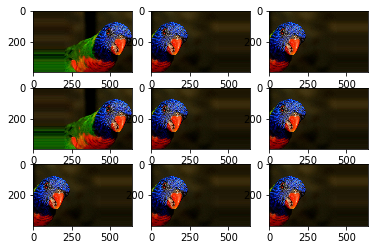

In [2]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('bird.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure